In [14]:
import numpy as np
from scipy.io import wavfile
from scipy.signal import hilbert
import matplotlib.pyplot as plt
from python_speech_features import mfcc

In [2]:
data_type = 'raw'
time_len = 20    ##ms

In [3]:
def extract_env(wav):
    hilb_wav = hilbert(wav)
    amp_envelope = np.abs(hilb_wav)
    hilb_phase = np.unwrap(np.angle(hilb_wav))
    temp_fine = np.cos(hilb_phase)
    return amp_envelope, temp_fine

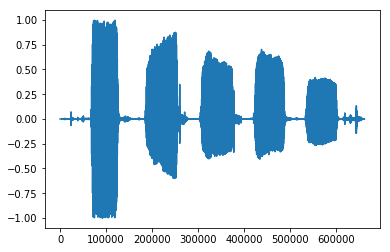

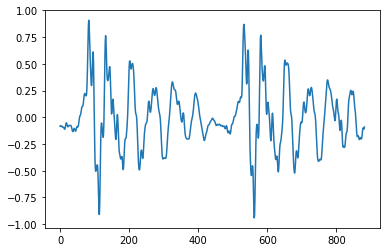

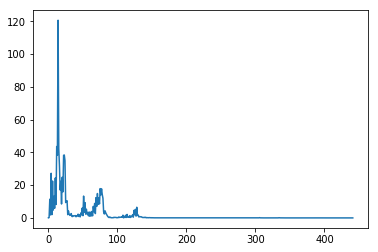

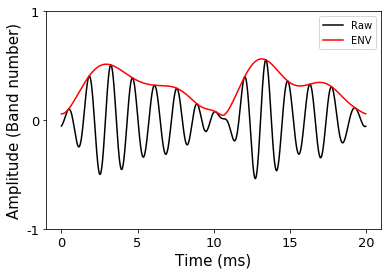

In [50]:
sr, wav = wavfile.read('1.wav')
wav = wav[:,0]
wav = ((2./65535.) * (wav.copy().astype(np.float32) - 32767) + 1.)
plt.plot(wav)
plt.show()

# t = np.arange(882)
# plt.plot(t, wav[200500:201500-118], 'b', label = 'e')
# plt.plot(t, wav[360200:361200-118], 'r', label = 'i')
# plt.plot(t, wav[99000:100000-118], 'limegreen', label='a')
# # plt.legend()
# plt.xticks([0,44.1*5, 44.1*10, 44.1*15, 44.1*20], [0, 5, 10, 15, 20], fontsize=13)
# plt.yticks([-32000,0,32000], [-1,0,1],fontsize=13)
# plt.ylabel('Amplitude', fontsize=15)
# plt.xlabel('Time (ms)', fontsize=15)
# plt.savefig('aei_raw.png')
# plt.show()

# t = np.arange(882)
# plt.plot(t, wav[550700:551700-118], 'b', label = 'u')
# plt.plot(t, wav[459110:460110-118], 'r', label = 'o')

# # plt.legend()
# plt.xticks([0,44.1*5, 44.1*10, 44.1*15, 44.1*20], [0, 5, 10, 15, 20], fontsize=13)
# plt.yticks([-32000,0,32000], [-1,0,1],fontsize=13)
# plt.ylabel('Amplitude', fontsize=15)
# plt.xlabel('Time (ms)', fontsize=15)
# plt.savefig('ou_raw.png')
# plt.show()

t = np.arange(882)
wav = wav[99000:100000-118]
plt.plot(wav)
plt.show()

fft = np.fft.rfft(wav)
plt.plot(np.abs(fft))
plt.show()


fft_ = fft.copy()
fft_[20:]=0
fft_[:10]=0
wav_ = np.fft.irfft(fft_)
env = np.abs(hilbert(wav_))

plt.plot(wav_,'k', label='Raw')
plt.plot(env,'r', label = 'ENV')

# plt.legend()
plt.xticks([0,44.1*5, 44.1*10, 44.1*15, 44.1*20], [0, 5, 10, 15, 20], fontsize=13)
plt.yticks([-1,0,1], [-1,0,1],fontsize=13)
plt.ylabel('Amplitude (Band number)', fontsize=15)
plt.xlabel('Time (ms)', fontsize=15)
plt.legend()
plt.savefig('env_raw.png')
plt.show()

In [8]:
np.random.seed(37)

people_arr = np.arange(65)+1
np.random.shuffle(people_arr)
print(people_arr)

##[30 19 53 40 28 10 34  1  6  7 14 51 52 46 17 37  5 65 12 33 64 21 50 39
##  2 59 38 55 15  8 31 42 49 26 35 61  3 58 11 56 20 45 47 18 27 48 62 63
## 57 41  9 32 24 25 22 43  4 36 23 54 29 60 13 44 16]

label_set = [[1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1]]

[30 19 53 40 28 10 34  1  6  7 14 51 52 46 17 37  5 65 12 33 64 21 50 39
  2 59 38 55 15  8 31 42 49 26 35 61  3 58 11 56 20 45 47 18 27 48 62 63
 57 41  9 32 24 25 22 43  4 36 23 54 29 60 13 44 16]


0.6607694625854492 0.6607694625854493


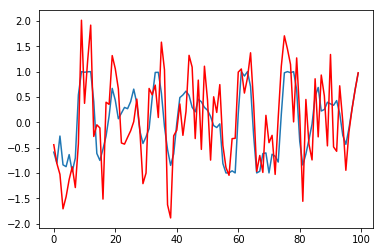

In [28]:
if data_type=='raw':
    point_len = int(time_len*10)
    SNR = 0
    
    for k1 in range(50):
        for k2 in range(5):
            file_name = 'data/wav_10k/OS1_%d_%d.wav'%(people_arr[k1], k2+1)
            sr, wav = wavfile.read(file_name)
            wav = (2./65535.) * (wav.astype(np.float32) - 32767) + 1.
            
            Vs = np.sqrt(np.mean(np.square(wav)))
            Vni = Vs/(10**(SNR/20))
            noise = 2*np.random.random(np.shape(wav))-1
            Vn = np.sqrt(np.mean(np.square(noise)))
            noise = noise*(Vni/Vn)
            Vn = np.sqrt(np.mean(np.square(noise)))
            wav += noise
            
            wav = wav[:4000].reshape(-1, point_len)
            dlabel = np.array([label_set[k2]]*len(wav))
            
            
            if k1==0 and k2==0:
                trainX = wav
                trainY = dlabel
            else:
                trainX = np.concatenate((trainX, wav))
                trainY = np.concatenate((trainY, dlabel))

    for k1 in range(15):
        for k2 in range(5):
            file_name = 'data/wav_10k/OS1_%d_%d.wav'%(people_arr[50+k1], k2+1)
            sr, wav = wavfile.read(file_name)
            wav = (2./65535.) * (wav.astype(np.float32) - 32767) + 1.
            
            
            Vs = np.sqrt(np.mean(np.square(wav)))
            Vni = Vs/(10**(SNR/20))
            noise = 2*np.random.random(np.shape(wav))-1
            Vn = np.sqrt(np.mean(np.square(noise)))
            noise = noise*(Vni/Vn)
            Vn = np.sqrt(np.mean(np.square(noise)))
            wav += noise
            
            
            wav = wav[:4000].reshape(-1, point_len)
            dlabel = [label_set[k2]]*len(wav)
            
            if k1==0 and k2==0:
                testX = wav
                testY = dlabel
            else:
                testX = np.concatenate((testX, wav))
                testY = np.concatenate((testY, dlabel))
    
    np.save('npy_data/raw/raw_%.1fms_trainX.npy'%SNR, trainX)
    np.save('npy_data/raw/raw_%.1fms_trainY.npy'%SNR, trainY)
    np.save('npy_data/raw/raw_%.1fms_testX.npy'%SNR, testX)
    np.save('npy_data/raw/raw_%.1fms_testY.npy'%SNR, testY)
    
    print('raw data shape  -  %.1f dB'%SNR)
    print('train set :', np.shape(trainX) , np.shape(trainY))
    print('test set :', np.shape(testX) ,np.shape(testY))